<a href="https://colab.research.google.com/github/AMiller113/Machine_Learning/blob/master/Machine_Learning_Spam_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow-gpu
import tensorflow as tf
tf.__version__

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 3.8MB 61.5MB/s 
     |████████████████████████████████| 450kB 43.0MB/s 
     |████████████████████████████████| 81kB 11.9MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.


'2.1.0'

In [0]:
from tensorflow.keras.layers import Input, LSTM, Dense, GlobalMaxPooling1D, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
# Text Data for spam detector
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-01-15 20:48:53--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:30::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K   590KB/s    in 0.8s    

2020-01-15 20:48:55 (590 KB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [0]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [0]:
df.columns = ['Labels', 'Data']

In [0]:
df.head()

,Labels,Data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df['B_Labels'] = df['Labels'].map({'ham': 0, 'spam': 1}) # Create the target labels, for use in the dense layer signoid function
Y = df['B_Labels'].values # Create the target vector

In [0]:
# Split the data into test-validation sets
df_train, df_test, Y_train, Y_test = train_test_split(df['Data'], Y, test_size = 0.33)

In [0]:
# Tokenizing the inputs and targets
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequence_train = tokenizer.texts_to_sequences(df_train)
sequence_test = tokenizer.texts_to_sequences(df_test)

In [0]:
# Padding Sequences
X_train = pad_sequences(sequence_train)
X_test = pad_sequences(sequence_test, maxlen=X_train.shape[1]) # The test set has a shorter sequence length than the train set and needs to be padded using maxlen 

In [0]:
X_test.shape

(1839, 98)

In [0]:
# Creating the LSTM
i = Input(shape=(X_train.shape[1],)) # X_train.shape[1] is the sequence length T
x = Embedding(len(tokenizer.word_index)+1, 20)(i) # The first index is 1 not 0, so the embedding size has to be the tokenizer index length plus 1
x = LSTM(15, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
r = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Train on 3733 samples, validate on 1839 samples
Epoch 1/20
3733/3733 [==============================] - 9s 2ms/sample - loss: 0.4858 - accuracy: 0.8537 - val_loss: 0.4032 - val_accuracy: 0.8559
Epoch 2/20
3733/3733 [==============================] - 1s 387us/sample - loss: 0.3278 - accuracy: 0.8709 - val_loss: 0.2818 - val_accuracy: 0.8559
Epoch 3/20
3733/3733 [==============================] - 1s 390us/sample - loss: 0.2336 - accuracy: 0.8709 - val_loss: 0.2262 - val_accuracy: 0.8559
Epoch 4/20
3733/3733 [==============================] - 1s 362us/sample - loss: 0.1817 - accuracy: 0.8744 - val_loss: 0.1751 - val_accuracy: 0.9418
Epoch 5/20
3733/3733 [==============================] - 1s 375us/sample - loss: 0.1300 - accuracy: 0.9861 - val_loss: 0.1282 - val_accuracy: 0.9897
Epoch 6/20
3733/3733 [==============================] - 1s 371us/sample - loss: 0.0938 - accuracy: 0.9962 - val_loss: 0.1010 - val_accuracy: 0.9913
Epoch 7/20
3733/3733 [==============================] - 1s 379us/s

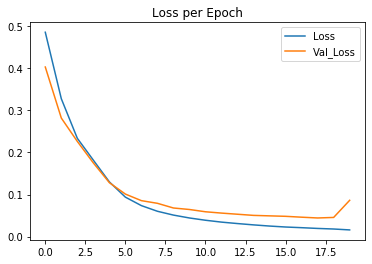

In [0]:
# Loss plot
plt.plot(r.history['loss'], Label= 'Loss')
plt.plot(r.history['val_loss'], Label= 'Val_Loss')
plt.legend()
plt.title('Loss per Epoch')
plt.show()

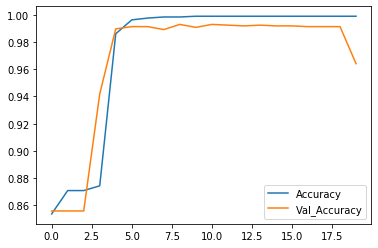

In [0]:
# Accuracy Plot
plt.plot(r.history['accuracy'], Label = 'Accuracy')
plt.plot(r.history['val_accuracy'], Label = 'Val_Accuracy')
plt.legend()
plt.show()